In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
n_samples = 1000

X, y = make_circles(n_samples,noise=0.03,random_state=42)

# check the feature x
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the feature y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

#### In order to understand the data better it's good to visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label":y})

In [6]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


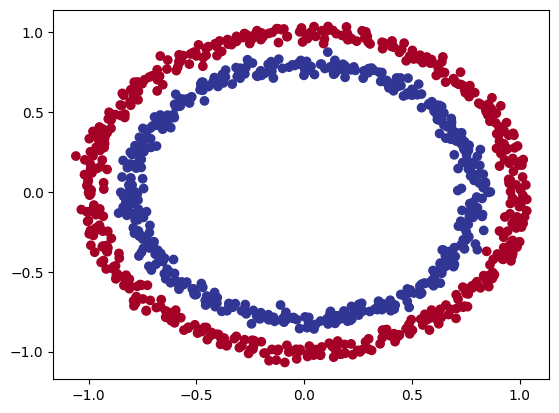

In [7]:
# Visualize using a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Steps in Modeling
1. Create the model
2. compile the model
3. fit the model
4. Evaluate the model
5. Tweak the model for better performance
6. Evaluate the model

In [8]:
# set the random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy'])

model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.6449 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.0296 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.6194 - accuracy: 0.5120
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7488 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.4960


In [9]:
model.fit(X,y,epochs=200, verbose=0)

In [10]:
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_2.fit(X,y,epochs=100, verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Create  a new model_3 to have a better model from last 2 models

In [21]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.4462 - accuracy: 0.4520
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5220
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5030
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4770
Epoch 11/

In [22]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5090


[0.7007941007614136, 0.5090000033378601]

In [23]:
model_3.predict(X)

32/32 [==============================] - 0s 999us/step


array([[0.48362812],
       [0.575116  ],
       [0.5802351 ],
       [0.5877054 ],
       [0.42877963],
       [0.59211373],
       [0.5707037 ],
       [0.4769707 ],
       [0.4747699 ],
       [0.59207416],
       [0.52159256],
       [0.53612757],
       [0.5792264 ],
       [0.44747105],
       [0.43914238],
       [0.45374924],
       [0.55374795],
       [0.45710373],
       [0.5622291 ],
       [0.50821936],
       [0.5062788 ],
       [0.6091634 ],
       [0.45184267],
       [0.4876644 ],
       [0.60506165],
       [0.5897533 ],
       [0.56318283],
       [0.4534968 ],
       [0.449202  ],
       [0.44359696],
       [0.47674784],
       [0.5967438 ],
       [0.56798005],
       [0.45305339],
       [0.45146975],
       [0.6126035 ],
       [0.59076566],
       [0.53524286],
       [0.45033425],
       [0.51138663],
       [0.50344247],
       [0.55555004],
       [0.5172244 ],
       [0.44719705],
       [0.5313639 ],
       [0.5516222 ],
       [0.43741396],
       [0.553

### All of the preditctions are arround 0.5 but let's see this visually.

Lets create a plotting fuction called plot_decision_boundry(). This function will

1. Take in trained model, Feature X and labels y
2. create a meshGrid

In [24]:
import numpy as np

In [25]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step


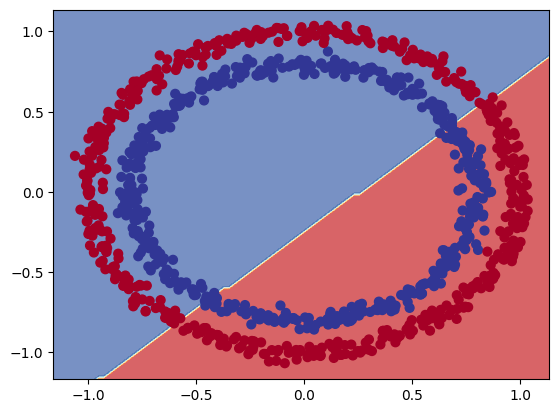

In [26]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [18]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [19]:
np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

[array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

## Lets see if our model can work with regression data

In [52]:
tf.random.set_seed(42)

X_regression = tf.range(1,1000, 5)
y_regression = tf.range(100,1100,5) 

# Relateion between X and Y is y = x + 100

# Lets split our data into test and train data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 

# Reshape input data for the model
# X_reg_train = tf.reshape(X_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)
# y_reg_train = tf.reshape(y_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)


In [53]:
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

#### We have compiled our model for a classification problem now we are dealing with regression problem, lets create a model to work with our regression data

In [75]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=600)

Epoch 1/600
5/5 [==============================] - 1s 3ms/step - loss: 519.9915 - mae: 519.9915
Epoch 2/600
5/5 [==============================] - 0s 2ms/step - loss: 406.0309 - mae: 406.0309
Epoch 3/600
5/5 [==============================] - 0s 2ms/step - loss: 295.8665 - mae: 295.8665
Epoch 4/600
5/5 [==============================] - 0s 2ms/step - loss: 181.6627 - mae: 181.6627
Epoch 5/600
5/5 [==============================] - 0s 2ms/step - loss: 69.2515 - mae: 69.2515
Epoch 6/600
5/5 [==============================] - 0s 2ms/step - loss: 74.1057 - mae: 74.1057
Epoch 7/600
5/5 [==============================] - 0s 2ms/step - loss: 84.5207 - mae: 84.5207
Epoch 8/600
5/5 [==============================] - 0s 2ms/step - loss: 56.7466 - mae: 56.7466
Epoch 9/600
5/5 [==============================] - 0s 2ms/step - loss: 46.8619 - mae: 46.8619
Epoch 10/600
5/5 [==============================] - 0s 2ms/step - loss: 53.2816 - mae: 53.2816
Epoch 11/600
5/5 [==============================] -

In [76]:
y_reg_pred = model_4.predict(X_reg_test)

2/2 [==============================] - 0s 3ms/step


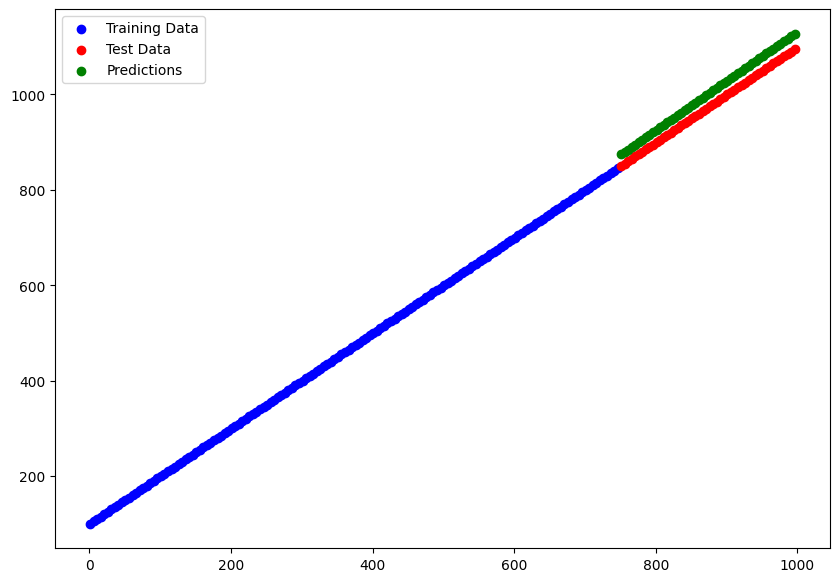

In [77]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b", label="Training Data")
plt.scatter(X_reg_test,y_reg_test, c='r', label="Test Data")
plt.scatter(X_reg_test,y_reg_pred, c='g', label="Predictions")
plt.legend()